In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim
import copy

In [2]:
# to find out whether there is actuall GPU or not in this particular instance
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [17]:
# Dataset, transform and visualization
# declare transform_train, transform_test objects
transform_train = transforms.Compose([transforms.RandomResizedCrop(299),
                                      transforms.ToTensor(),
                                      transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))])

transform_test = transforms.Compose([transforms.RandomResizedCrop(299),
                                      transforms.ToTensor(),
                                      transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))])

In [23]:
# create the train dataset and transform
# CIFAR10 dataset has 32 X 32 images
trainset = torchvision.datasets.CIFAR10(root='./data',
                                        train=True,
                                        download=True,
                                        transform = transform_train)

Files already downloaded and verified


In [24]:
# create the test dataset and transform
testset = torchvision.datasets.CIFAR10(root='./data',
                                       train=False,
                                       download=True,
                                       transform=transform_test)

Files already downloaded and verified


In [6]:
# https://pytorch.org/docs/stable/torchvision/models.html
from torchvision import models

In [7]:
inception = models.inception_v3(pretrained=True)

Downloading: "https://download.pytorch.org/models/inception_v3_google-1a9a5a14.pth" to /root/.cache/torch/hub/checkpoints/inception_v3_google-1a9a5a14.pth


In [8]:
print(inception)

Inception3(
  (Conv2d_1a_3x3): BasicConv2d(
    (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2a_3x3): BasicConv2d(
    (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2b_3x3): BasicConv2d(
    (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool1): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (Conv2d_3b_1x1): BasicConv2d(
    (conv): Conv2d(64, 80, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(80, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_4a_3x3): BasicConv2d(
    (conv): Conv2d(80, 192, kernel_size=(3, 3), stri

In [25]:
# set the requires_grad attribute of each parameter as false
# if i am doing back propogation, dont go and update certain weight or bias
for param in inception.parameters():
  param.requires_grad = False

In [26]:
num_classes = 10
batch_size = 16

In [27]:
aux_in_features = inception.AuxLogits.fc.in_features
inception.AuxLogits.fc = nn.Linear(aux_in_features,num_classes)

In [28]:
for param in inception.parameters():
  if param.requires_grad:
    print(param.shape)

torch.Size([10, 768])
torch.Size([10])


In [29]:
in_features = inception.fc.in_features
inception.fc = nn.Linear(in_features,num_classes)

In [30]:
for param in inception.parameters():
  if param.requires_grad:
    print(param.shape)

torch.Size([10, 768])
torch.Size([10])
torch.Size([10, 2048])
torch.Size([10])


In [31]:
trainloader = torch.utils.data.DataLoader(trainset,batch_size=batch_size,shuffle=True)
testloader = torch.utils.data.DataLoader(testset,batch_size=batch_size,shuffle=False)

In [32]:
inception = inception.to(device)
loss_fn = nn.CrossEntropyLoss()
opt = optim.SGD(inception.parameters(),lr=0.05)

In [33]:
def evaluation(dataloader,model):
  total, correct = 0,0
  for data in dataloader:
    inputs, labels = data
    inputs, labels = inputs.to(device), labels.to(device)
    outputs,aux_outputs = model(inputs)
    _,pred = torch.max(outputs.data,1)
    total += labels.size(0)
    correct += (pred == labels).sum().item()
    return 100*correct/total

min loss 3.02 
Iteration: 0/3125, Loss: 3.02
min loss 2.98 
min loss 2.93 
min loss 2.59 
min loss 2.47 
min loss 2.34 
min loss 2.06 
min loss 2.01 
min loss 1.95 
Iteration: 100/3125, Loss: 2.39
min loss 1.94 
min loss 1.78 
min loss 1.63 
Iteration: 200/3125, Loss: 2.05
min loss 1.37 
min loss 1.34 
Iteration: 300/3125, Loss: 1.90
min loss 1.18 
Iteration: 400/3125, Loss: 2.30
Iteration: 500/3125, Loss: 2.78
Iteration: 600/3125, Loss: 2.33
Iteration: 700/3125, Loss: 2.68
Iteration: 800/3125, Loss: 1.99
min loss 1.18 
Iteration: 900/3125, Loss: 2.71
Iteration: 1000/3125, Loss: 1.67
Iteration: 1100/3125, Loss: 2.19
min loss 1.12 
Iteration: 1200/3125, Loss: 1.93
min loss 0.77 
Iteration: 1300/3125, Loss: 3.40
Iteration: 1400/3125, Loss: 1.75
Iteration: 1500/3125, Loss: 2.96
Iteration: 1600/3125, Loss: 1.77
Iteration: 1700/3125, Loss: 1.97
Iteration: 1800/3125, Loss: 2.19
Iteration: 1900/3125, Loss: 2.46
Iteration: 2000/3125, Loss: 2.43
Iteration: 2100/3125, Loss: 2.17
Iteration: 2200/

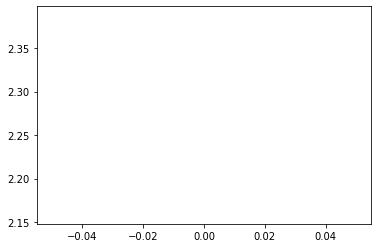

Iteration: 0/3125, Loss: 2.39
Iteration: 100/3125, Loss: 1.86
Iteration: 200/3125, Loss: 2.20
Iteration: 300/3125, Loss: 1.22
Iteration: 400/3125, Loss: 2.23
Iteration: 500/3125, Loss: 1.81
Iteration: 600/3125, Loss: 1.88
Iteration: 700/3125, Loss: 2.33
Iteration: 800/3125, Loss: 2.25
Iteration: 900/3125, Loss: 2.27
Iteration: 1000/3125, Loss: 1.89
Iteration: 1100/3125, Loss: 2.43
Iteration: 1200/3125, Loss: 1.89
Iteration: 1300/3125, Loss: 2.66
Iteration: 1400/3125, Loss: 1.69
Iteration: 1500/3125, Loss: 2.43
Iteration: 1600/3125, Loss: 2.47
Iteration: 1700/3125, Loss: 2.22
Iteration: 1800/3125, Loss: 2.43
Iteration: 1900/3125, Loss: 1.92
Iteration: 2000/3125, Loss: 2.64
Iteration: 2100/3125, Loss: 2.05
Iteration: 2200/3125, Loss: 1.48
Iteration: 2300/3125, Loss: 2.44
Iteration: 2400/3125, Loss: 1.94
Iteration: 2500/3125, Loss: 2.09
Iteration: 2600/3125, Loss: 2.39
Iteration: 2700/3125, Loss: 2.41
Iteration: 2800/3125, Loss: 2.44
Iteration: 2900/3125, Loss: 1.95
Iteration: 3000/3125, 

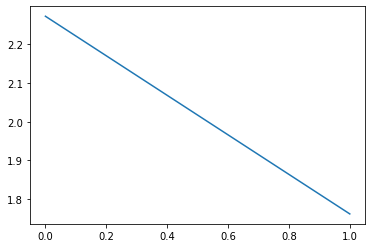

Iteration: 0/3125, Loss: 2.14
Iteration: 100/3125, Loss: 3.12
Iteration: 200/3125, Loss: 1.98
Iteration: 300/3125, Loss: 1.72
Iteration: 400/3125, Loss: 1.90
Iteration: 500/3125, Loss: 2.71
Iteration: 600/3125, Loss: 2.88
Iteration: 700/3125, Loss: 2.78
Iteration: 800/3125, Loss: 1.49
Iteration: 900/3125, Loss: 1.69
Iteration: 1000/3125, Loss: 2.69
Iteration: 1100/3125, Loss: 2.54
Iteration: 1200/3125, Loss: 2.50
Iteration: 1300/3125, Loss: 1.65
Iteration: 1400/3125, Loss: 3.42
Iteration: 1500/3125, Loss: 2.21
min loss 0.76 
Iteration: 1600/3125, Loss: 2.44
Iteration: 1700/3125, Loss: 1.83
Iteration: 1800/3125, Loss: 1.77
Iteration: 1900/3125, Loss: 2.32
Iteration: 2000/3125, Loss: 3.11
Iteration: 2100/3125, Loss: 2.70
Iteration: 2200/3125, Loss: 2.50
Iteration: 2300/3125, Loss: 1.23
Iteration: 2400/3125, Loss: 2.33
Iteration: 2500/3125, Loss: 2.04
Iteration: 2600/3125, Loss: 1.82
Iteration: 2700/3125, Loss: 1.87
Iteration: 2800/3125, Loss: 1.69
Iteration: 2900/3125, Loss: 2.37
Iterati

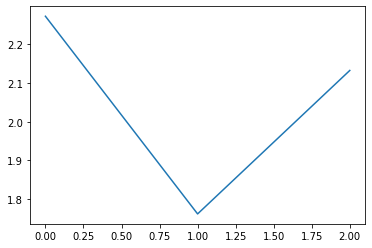

Iteration: 0/3125, Loss: 2.18
Iteration: 100/3125, Loss: 1.46
Iteration: 200/3125, Loss: 2.20
Iteration: 300/3125, Loss: 2.09
Iteration: 400/3125, Loss: 1.61
Iteration: 500/3125, Loss: 2.88
Iteration: 600/3125, Loss: 2.34
Iteration: 700/3125, Loss: 1.65
Iteration: 800/3125, Loss: 2.43
Iteration: 900/3125, Loss: 1.91
Iteration: 1000/3125, Loss: 2.04
Iteration: 1100/3125, Loss: 1.67
Iteration: 1200/3125, Loss: 3.16
Iteration: 1300/3125, Loss: 1.69
Iteration: 1400/3125, Loss: 2.26
Iteration: 1500/3125, Loss: 2.72
Iteration: 1600/3125, Loss: 2.05
Iteration: 1700/3125, Loss: 2.89
Iteration: 1800/3125, Loss: 1.89
Iteration: 1900/3125, Loss: 1.65
Iteration: 2000/3125, Loss: 2.96
Iteration: 2100/3125, Loss: 2.55
Iteration: 2200/3125, Loss: 2.85
Iteration: 2300/3125, Loss: 1.84
Iteration: 2400/3125, Loss: 1.58
Iteration: 2500/3125, Loss: 1.87
Iteration: 2600/3125, Loss: 2.20
Iteration: 2700/3125, Loss: 1.55
Iteration: 2800/3125, Loss: 3.92
Iteration: 2900/3125, Loss: 2.15
Iteration: 3000/3125, 

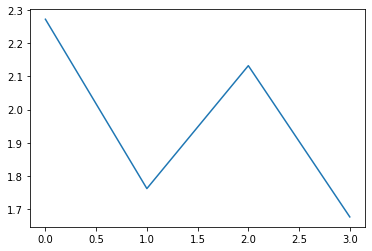

In [34]:
# need to back propogate through auxillary loss & final output loss
# main loss is given a weight 1 and auxillary loss is given a lesser weight of 0.3

loss_epoch_arr = []
max_epochs = 4

min_loss = 1000

n_iters = np.ceil(50000/batch_size)

for epoch in range(max_epochs):

  for i, data in enumerate(trainloader,0):

    inputs, labels = data
    inputs, labels = inputs.to(device), labels.to(device)

    opt.zero_grad()

    outputs, aux_outputs = inception(inputs)
    loss = loss_fn(outputs,labels) + 0.3 * loss_fn(aux_outputs,labels)
    loss.backward()
    opt.step()

    if min_loss > loss.item():
      min_loss = loss.item()
      best_model = copy.deepcopy(inception.state_dict())
      print('min loss %0.2f ' % min_loss)

    del inputs, labels, outputs
    torch.cuda.empty_cache()

    if i%100 == 0:
      print('Iteration: %d/%d, Loss: %0.2f' %(i, n_iters, loss.item()))

  loss_epoch_arr.append(loss.item())

  print('Epoch: %d/%d, Test acc: %0.2f, Train acc: %0.2f' % (
      epoch, max_epochs,
      evaluation(testloader,inception),
      evaluation(trainloader,inception)
  ))

  plt.plot(loss_epoch_arr)
  plt.show()

In [35]:
# the network will import the weights of all parameters as per the best_model
inception.load_state_dict(best_model)
print(evaluation(testloader,inception), evaluation(trainloader,inception))

43.75 37.5
